<center>
<h1> Linear Regression Case Study
</center>

#### Steps for Regression Modeling:
1. Business problem definition - One of major automobile company would like to design new product which can improve the sales. Inorder to define the product, they want to understand identify drivers for the sales(what are the factors driving sales) and Predicting sales of different car models given driving factors. 
2. convert business problem into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. Finding the right technique - Since it is predicting value (Regression Problem) problem so we can use OLS as one of the technique. We can also use other techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.
4. Data colletion(Y, X) - Identify the sources of information and collect the data
5. Consolidate the data - aggregate and consolidate the data at Model level/customer level/store level depends on business problem
6. Data preparation for modeling (create data audit report to identify the steps to perform as part of data preparation)
    a. missing value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. Basic assumptions (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets (50:50 if you have more data else 70:30 or 80:20)
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

#View graph in the same notebook.Customize look and feel.
%pylab inline 
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Populating the interactive namespace from numpy and matplotlib


In [6]:
import sklearn.metrics as skmetrics

In [8]:
dir(skmetrics)

['SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'base',
 'brier_score_loss',
 'calinski_harabaz_score',
 'classification',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_similarity_score',
 'label_ranking_average_precision_score',
 'label_ranking_loss',
 'log_loss',
 'make_scorer',
 'matthews_corrcoef',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'mutual_info_score',
 'normalized_mutual_info_score',
 'pairwise',
 'pairwise_distanc

In [9]:
import sklearn.preprocessing as skpreprocess

In [10]:
dir(skpreprocess)

['Binarizer',
 'FunctionTransformer',
 'Imputer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'PolynomialFeatures',
 'RobustScaler',
 'StandardScaler',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_function_transformer',
 'add_dummy_feature',
 'binarize',
 'data',
 'imputation',
 'label',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'robust_scale',
 'scale']

In [11]:
#linear reg model
import sklearn.linear_model as sklr

In [12]:
dir(sklr)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'RANSACRegressor',
 'RandomizedLasso',
 'RandomizedLogisticRegression',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'bayes',
 'cd_fast',
 'coordinate_descent',
 'enet_path',
 'huber',
 'lars_path',
 'lasso_path',
 'lasso_stability_path',

In [13]:
#Import data
car_sales = pd.read_csv('Car_sales.csv')

In [14]:
#Understand DS and Metadata
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [6]:
car_sales.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [7]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [8]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [9]:
car_sales.dtypes

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

In [15]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(car_sales)

Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.7 KiB
Average record size in memory,128.5 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [16]:
dict(car_sales.dtypes)

{'Curb_weight': dtype('float64'),
 'Engine_size': dtype('float64'),
 'Fuel_capacity': dtype('float64'),
 'Fuel_efficiency': dtype('float64'),
 'Horsepower': dtype('float64'),
 'Latest_Launch': dtype('O'),
 'Length': dtype('float64'),
 'Manufacturer': dtype('O'),
 'Model': dtype('O'),
 'Power_perf_factor': dtype('float64'),
 'Price_in_thousands': dtype('float64'),
 'Sales_in_thousands': dtype('float64'),
 'Vehicle_type': dtype('O'),
 'Wheelbase': dtype('float64'),
 'Width': dtype('float64'),
 'four_year_resale_value': dtype('float64')}

In [17]:
numeric_var = [key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

In [18]:
numeric_var

['Sales_in_thousands',
 'four_year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [19]:
#Figure out numerical and categorical variables 
numeric_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']
['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']


In [20]:
#Dataset with only numeric variables
#Filter columns using [] or using methods
car_sales_num=car_sales[numeric_var_names]
car_sales_num.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [13]:
#Same as before
car_sales_num=car_sales._get_numeric_data()
car_sales_num.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [21]:
#Dataset with categorical vars only
car_sales_cat = car_sales[cat_var_names]
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [24]:
#Function for univariate
def univariate_analysis(x):
    #check whether its null or not
    N = x.count()
    x.isnull()
    #...count of missing values
    Nmiss = x.isnull().sum()
    Nmiss_pct = x.isnull().mean()
    #return the output as series
    return pd.Series([N,Nmiss,Nmiss_pct],index = ["N","Nmiss","Nmiss_pct"])

In [25]:
univariate_analysis(car_sales.Sales_in_thousands)

N            157.0
Nmiss          0.0
Nmiss_pct      0.0
dtype: float64

In [26]:
car_sales_num.apply(univariate_analysis)
#apply univariate funtion on this. Function applied on each and every numeric value


,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157.0,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
Nmiss,0.0,36.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000
Nmiss_pct,0.0,0.229299,0.012739,0.006369,0.006369,0.006369,0.006369,0.006369,0.012739,0.006369,0.019108,0.012739


In [27]:
#Tranpose the function o/p
car_sales_num.apply(univariate_analysis).T

,N,Nmiss,Nmiss_pct
Sales_in_thousands,157.0,0.0,0.000000
four_year_resale_value,121.0,36.0,0.229299
Price_in_thousands,155.0,2.0,0.012739
Engine_size,156.0,1.0,0.006369
Horsepower,156.0,1.0,0.006369
Wheelbase,156.0,1.0,0.006369
Width,156.0,1.0,0.006369
Length,156.0,1.0,0.006369
Curb_weight,155.0,2.0,0.012739
Fuel_capacity,156.0,1.0,0.006369


In [28]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=car_sales_num.apply(lambda x: var_summary(x)).T

In [29]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [30]:
#Export o/p to csv
num_summary.to_csv('num_summary.csv')

In [33]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [34]:
car_sales_cat=car_sales.select_dtypes(include=['object'])

In [35]:
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [36]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=car_sales_cat.apply(lambda x: cat_summary(x))

In [37]:
cat_summary

,Manufacturer,Model,Vehicle_type,Latest_Launch
N,157,157,157,157
NMISS,0,0,0,0
ColumnsNames,Dodge 11 Ford 11 Mercedes-B ...,Neon 2 LS400 1 Montan...,Passenger 116 Car 41 Name: Vehicl...,5/31/2011 2 9/10/2012 2 9/25/2011 ...


In [38]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(car_sales)

Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.7 KiB
Average record size in memory,128.5 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [39]:
car_sales['Sales_in_thousands'].quantile(0.01)

0.9372799999999999

In [ ]:
car_sales['Sales_in_thousands'].clip_upper(260.65)

In [31]:
#Handling Outliers - Method1
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_upper(car_sales['Sales_in_thousands'].quantile(0.99)) 
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_lower(car_sales['Sales_in_thousands'].quantile(0.01)) 


In [ ]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

In [32]:
#Handling Outliers - Method2. Apply on multiple variables
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x
#Apply on all numeric vars
car_sales_num=car_sales_num.apply(lambda x: outlier_capping(x))

In [33]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,0.93728,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,253.560581,260.645320
four_year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,6.17300,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,10.23144,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,1.55500,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Horsepower,156.0,1.0,28910.300000,185.322436,177.500000,52.816470,2789.579526,96.40000,98.380000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,317.087500,325.750000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,92.87500,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,66.08500,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,154.91500,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,2.24540,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000


In [34]:
#Handling Missings
# Fill with mean
car_sales['Sales_in_thousands']=car_sales['Sales_in_thousands'].fillna(car_sales['Sales_in_thousands'].median())

In [ ]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

In [35]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

car_sales_num=car_sales_num.apply(lambda x: Missing_imputation(x))

In [36]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,0.93728,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.64160,185.336200,253.560581,260.645320
four_year_resale_value,157.0,0.0,2690.901000,17.139497,14.180000,9.939494,98.793544,6.17300,6.874120,8.425000,9.710000,12.545000,14.180000,18.140000,27.02500,39.275000,59.312800,60.220000
Price_in_thousands,157.0,0.0,4281.553480,27.271041,22.799000,13.982815,195.519110,10.23144,10.485434,12.491000,13.976200,18.145000,22.799000,31.930000,43.78800,55.225000,76.514312,78.479800
Engine_size,157.0,0.0,478.810000,3.049745,3.000000,0.979133,0.958702,1.55500,1.580200,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,5.700000
Horsepower,157.0,0.0,29087.800000,185.272611,177.500000,52.650616,2772.087354,96.40000,98.416000,114.600000,120.000000,150.000000,177.500000,215.000000,253.80000,300.000000,316.930000,325.750000
Wheelbase,157.0,0.0,16867.100000,107.433758,107.000000,7.400543,54.768036,92.87500,93.001000,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,132.485000,134.375000
Width,157.0,0.0,11173.000000,71.165605,70.550000,3.379817,11.423163,66.08500,66.261400,66.500000,66.900000,68.400000,70.550000,73.400000,76.18000,78.200000,79.139600,79.190000
Length,157.0,0.0,29411.840000,187.336561,187.900000,13.078309,171.042158,154.91500,156.250600,163.700000,173.120000,177.600000,187.900000,196.100000,203.34000,208.500000,217.062200,219.305000
Curb_weight,157.0,0.0,530.454160,3.378689,3.342000,0.617780,0.381652,2.24540,2.247976,2.424000,2.612800,2.975000,3.342000,3.778000,4.11740,4.388400,5.394619,5.396680
Fuel_capacity,157.0,0.0,2817.100000,17.943312,17.200000,3.808060,14.501317,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.396000,30.900000


## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [37]:
car_sales.info()

#Object and String are both categorical var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [38]:
col_dummies=pd.get_dummies(car_sales['Vehicle_type'], prefix='Vehicle_type')

In [39]:
col_dummies

,Vehicle_type_Car,Vehicle_type_Passenger
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [ ]:
col_dummies=pd.get_dummies(car_sales['Vehicle_type'], prefix='Vehicle_type')
#Drop dummy column to counter dummy trap problem
#axis = 0 -- rows, axis = 1 -- column, inplace means replace if True
col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
car_sales_cat = pd.concat([car_sales['Vehicle_type'], col_dummies], axis=1)
car_sales_cat.drop( 'Vehicle_type', axis = 1, inplace = True )

In [ ]:
car_sales_cat.head(5)

In [40]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [ ]:
car_sales.info()

In [41]:
#for c_feature in categorical_features
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
car_sales_cat.head(5)

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
#car_sales=pd.concat(car_sales_num, car_sales_cat)
car_sales_new = pd.concat([car_sales_num, car_sales_cat], axis=1)

In [ ]:
car_sales_new.head(5)

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


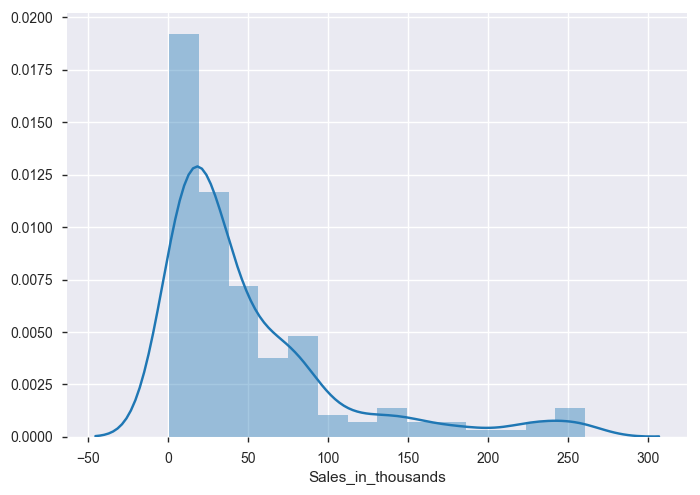

In [45]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(car_sales_new.Sales_in_thousands)

In [ ]:
#Above graph is skewed and is not ND...this is realted to exp dist..hence need log

In [47]:
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"]+1)

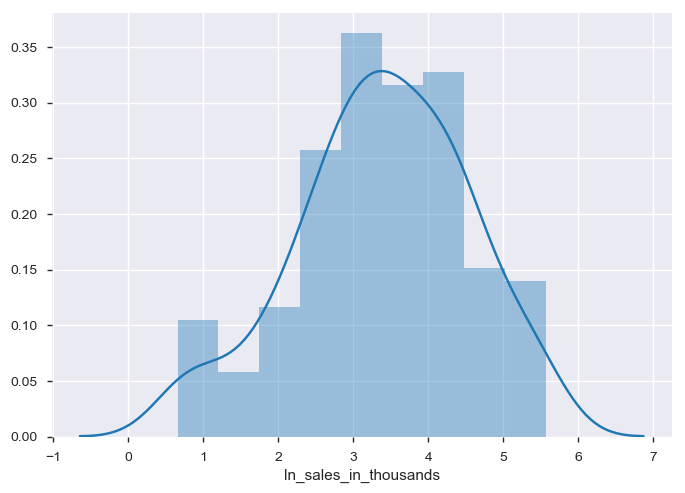

In [49]:
sns.distplot(car_sales_new.ln_sales_in_thousands)

In [48]:
#Dropping the variables
car_sales_new=car_sales_new.drop(['Sales_in_thousands'],axis=1)

In [49]:
car_sales_new.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_s

In [52]:
# correlation matrix (ranges from 1 to -1)
car_sales_new.corr()

,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
four_year_resale_value,1.000000,0.793482,0.433034,0.650285,-0.040888,0.165259,0.040030,0.276207,0.268711,-0.341003,...,-0.065511,0.517804,-0.033931,-0.097963,-0.033931,-0.018848,-0.056776,-0.059543,0.084599,-0.437248
Price_in_thousands,0.793482,1.000000,0.617601,0.847967,0.118272,0.328579,0.157225,0.526211,0.431413,-0.507150,...,-0.061809,0.352504,0.019062,-0.169161,-0.047888,-0.093559,-0.136904,0.052376,0.044229,-0.566011
Engine_size,0.433034,0.617601,1.000000,0.814995,0.518433,0.702596,0.576364,0.793321,0.698313,-0.757120,...,0.078343,0.016720,-0.104716,-0.191354,-0.063982,-0.108018,-0.221204,-0.153125,-0.278720,-0.109700
Horsepower,0.650285,0.847967,0.814995,1.000000,0.325276,0.538193,0.420399,0.637164,0.526638,-0.610719,...,-0.001035,0.231530,-0.016823,-0.226951,-0.043878,-0.115615,-0.244750,-0.011797,-0.010312,-0.393374
Wheelbase,-0.040888,0.118272,0.518433,0.325276,1.000000,0.681390,0.837535,0.656884,0.659692,-0.498976,...,0.046376,-0.260791,-0.045175,-0.083439,-0.092140,-0.093985,-0.203574,-0.085580,-0.382446,0.269422
Width,0.165259,0.328579,0.702596,0.538193,0.681390,1.000000,0.700024,0.710129,0.648637,-0.584584,...,0.042466,-0.060717,-0.073017,-0.200565,-0.110105,-0.115409,-0.187300,-0.094605,-0.239476,0.044473
Length,0.040030,0.157225,0.576364,0.420399,0.837535,0.700024,1.000000,0.622352,0.561758,-0.418688,...,0.096536,-0.149922,-0.014260,-0.061445,-0.059569,-0.103678,-0.304586,-0.059173,-0.130166,0.207925
Curb_weight,0.276207,0.526211,0.793321,0.637164,0.656884,0.710129,0.622352,1.000000,0.868023,-0.829389,...,0.007816,-0.094518,-0.044951,-0.221330,-0.020049,-0.070576,-0.161803,-0.030435,-0.518975,-0.056227
Fuel_capacity,0.268711,0.431413,0.698313,0.526638,0.659692,0.648637,0.561758,0.868023,1.000000,-0.821330,...,-0.001399,-0.034685,-0.007281,-0.260082,-0.046183,-0.011476,-0.170318,-0.005775,-0.592574,-0.018434
Fuel_efficiency,-0.341003,-0.507150,-0.757120,-0.610719,-0.498976,-0.584584,-0.418688,-0.829389,-0.821330,1.000000,...,0.053712,-0.062668,-0.022199,0.304881,0.021007,0.090764,0.121107,0.036863,0.597855,0.128691


In [50]:
corr_matrix=car_sales_new.corr()

In [51]:
corr_matrix.to_csv('corr_matrix.csv')

In [ ]:
dir(pd)

In [ ]:
pd.to_csv(corr_matrix, 'corr_matrix.csv')

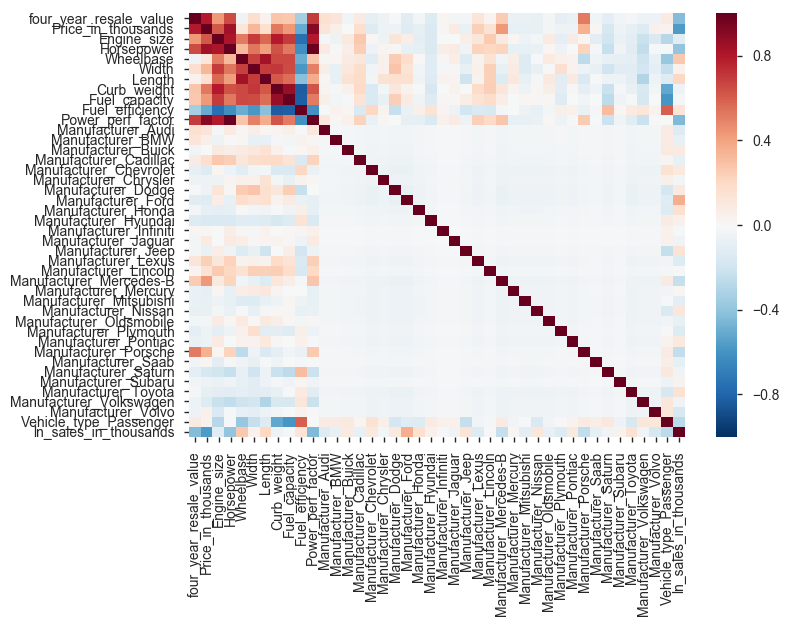

In [52]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

#### What relationships do you notice?

In [53]:
#Splitting the data
#Drop y variables to sepaarte it from x
feature_columns = car_sales_new.columns.difference( ['ln_sales_in_thousands'] )
feature_columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [54]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['ln_sales_in_thousands'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
#Another way to doing train-test split
train, test = train_test_split( car_sales_new,
                                test_size = 0.3,
                                random_state = 123 )

In [ ]:
train.head()

In [ ]:
print(len( train_X ))
print(len( test_X))

## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

In [56]:
#Stat model example
import statsmodels.formula.api as smf

In [59]:
#Take few variables as illustration
model1 = smf.ols('ln_sales_in_thousands~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac',train)

In [61]:
results = model1.fit()

In [62]:
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.466
Model:                               OLS   Adj. R-squared:                  0.411
Method:                    Least Squares   F-statistic:                     8.545
Date:                   Wed, 25 Apr 2018   Prob (F-statistic):           6.88e-10
Time:                           13:12:12   Log-Likelihood:                -138.29
No. Observations:                    109   AIC:                             298.6
Df Residuals:                         98   BIC:                             328.2
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------


In [ ]:
# interpreting results above ..f-statistic tells if model is possible or not. comparing models...if aic...log likelihood..bic..if 
#low then that model is better....Conditional Number is same as Conditional Index....

In [65]:
#Use VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_sales_in_thousands~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac', train, return_type='dataframe')

In [66]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [67]:
vif
#Ignore intercept.....shows correlation and helps to identify independent variables

,VIF Factor,features
0,461.734190,Intercept
1,7.392165,Curb_weight
2,5.613598,Engine_size
3,5.969009,Fuel_capacity
4,4.326148,Fuel_efficiency
5,3.037229,Horsepower
6,2.098425,Length
7,1.128162,Manufacturer_Audi
8,1.013172,Manufacturer_BMW
9,1.045466,Manufacturer_Buick


In [68]:
train.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_s

In [94]:
#Build the equation. Remove special chars such as - which will mean minus to python and replace it with space
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_MercedesB',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_sa

In [96]:
#Join all the variables with + to come up with an automated way to write the eq. Remove dependent var y
all_columns = "+".join(train.columns.difference( ['ln_sales_in_thousands'] ))

print(all_columns)



Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [97]:
my_formula = "ln_sales_in_thousands~" + all_columns

print(my_formula)

ln_sales_in_thousands~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [98]:
smf.ols?

In [74]:
import statsmodels.formula.api as smf

lm=smf.ols(formula=my_formula, data=train).fit()
#lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency+Vehicle_type_Passenger', train).fit()

In [75]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.783
Model:                               OLS   Adj. R-squared:                  0.660
Method:                    Least Squares   F-statistic:                     6.367
Date:                   Wed, 25 Apr 2018   Prob (F-statistic):           1.53e-11
Time:                           14:26:35   Log-Likelihood:                -89.307
No. Observations:                    109   AIC:                             258.6
Df Residuals:                         69   BIC:                             366.3
Df Model:                             39                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -5.9795      3.087     -1.937      0.057       -12.138     0.179
Curb_weight                 0.6642      0.396      1.677      0.098        -0.126     1.454
Engine_size                 0.2736      0.241      1.138      0.259        -0.206     0.753
Fuel_capacity              -0.1261      0.059     -2.128      0.037        -0.244    -0.008
Fuel_efficiency             0.1425      0.054      2.624      0.011         0.034     0.251
Horsepower                 -0.0149      0.018     -0.834      0.407        -0.051     0.021
Length                      0.0078      0.019      0.403      0.688        -0.031     0.046
Manufacturer_Audi          -0.2049      0.924     -0.222      0.825        -2.049     1.639
Manufacturer_BMW            0.2526      0.882      0.286      0.775        -1.507     2.012
Manufacturer_Buick          0.6000      0.666      0.901      0.371        -0.728     1.928
Manufacturer_Cadillac       0.4970      0.627      0.792      0.431        -0.754     1.749
Manufacturer_Chevrolet      0.2911      0.642      0.454      0.652        -0.989     1.571
Manufacturer_Chrysler      -0.2106      0.685     -0.307      0.760        -1.578     1.157
Manufacturer_Dodge          1.0129      0.647      1.566      0.122        -0.278     2.304
Manufacturer_Ford           1.4382      0.616      2.335      0.022         0.210     2.667
Manufacturer_Honda          1.7710      0.749      2.365      0.021         0.277     3.265
Manufacturer_Hyundai        0.7939      0.753      1.054      0.295        -0.708     2.296
Manufacturer_Infiniti   -4.178e-16    2.8e-16     -1.494      0.140     -9.76e-16   1.4e-16
Manufacturer_Jaguar         0.8247      0.923      0.894      0.374        -1.016     2.665
Manufacturer_Jeep           2.2341      0.818      2.730      0.008         0.602     3.866
Manufacturer_Lexus          0.6996      0.633      1.104      0.273        -0.564     1.963
Manufacturer_Lincoln        0.6105      0.696      0.877      0.383        -0.778     1.999
Manufacturer_MercedesB      0.5188      0.601      0.863      0.391        -0.680     1.717
Manufacturer_Mercury        0.1612      0.727      0.222      0.825        -1.289     1.611
Manufacturer_Mitsubishi     0.3254      0.638      0.510      0.612        -0.947     1.598
Manufacturer_Nissan         1.3380      0.645      2.074      0.042         0.051     2.625
Manufacturer_Oldsmobile    -0.0976      0.630     -0.155      0.877        -1.355     1.159
Manufacturer_Plymouth      -0.9589      1.246     -0.769      0.444        -3.446     1.528
Manufacturer_Pontiac        0.4777      0.634      0.753      0.454        -0.787     1.743
Manufacturer_Porsche        1.3984      0.882      1.586      0.117        -0.360     3.157
Manufacturer_S

In [75]:
lm=smf.ols(formula='ln_sales_in_thousands~Price_in_thousands+Vehicle_type_Passenger+Wheelbase',data=train).fit()

In [76]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.538
Model:                               OLS   Adj. R-squared:                  0.525
Method:                    Least Squares   F-statistic:                     40.83
Date:                   Wed, 04 Apr 2018   Prob (F-statistic):           1.43e-17
Time:                           14:59:44   Log-Likelihood:                -130.32
No. Observations:                    109   AIC:                             268.6
Df Residuals:                        105   BIC:                             279.4
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.1035      1.207     -0.086      0.932      -2.497       2.290
Price_in_thousands        -0.0564      0.006     -9.773      0.000      -0.068      -0.045
Vehicle_type_Passenger    -0.3692      0.190     -1.947      0.054      -0.745       0.007
Wheelbase                  0.0502      0.011      4.615      0.000       0.029       0.072
==============================================================================
Omnibus:                        1.884   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.454
Skew:                          -0.272   Prob(JB):                        0.483
Kurtosis:                       3.157   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
test.head(5)

,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
24,36.225,45.705,5.7,325.75,104.5,73.6,179.7,3.210,19.1,22.0,...,0,0,0,0,0,0,0,0,1,2.941646
23,13.025,24.340,3.8,200.00,101.1,74.1,193.2,3.500,16.8,25.0,...,0,0,0,0,0,0,0,0,1,3.310616
138,18.140,25.545,3.0,210.00,107.1,71.7,191.9,3.417,18.5,26.0,...,0,0,0,0,0,1,0,0,1,4.172061
87,13.890,16.540,2.0,125.00,106.4,69.6,185.0,2.892,16.0,30.0,...,0,0,0,0,0,0,0,0,1,3.315240
134,14.180,22.695,2.5,165.00,103.5,67.5,185.8,3.415,16.9,25.0,...,0,0,0,0,1,0,0,0,1,3.873428


In [77]:
test.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_s

In [78]:
test.columns= [phrase.strip().replace('-', '') for phrase in test.columns]
test.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_MercedesB',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_sa

In [79]:
test.head()

,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
24,36.225,45.705,5.7,325.75,104.5,73.6,179.7,3.210,19.1,22.0,...,0,0,0,0,0,0,0,0,1,2.941646
23,13.025,24.340,3.8,200.00,101.1,74.1,193.2,3.500,16.8,25.0,...,0,0,0,0,0,0,0,0,1,3.310616
138,18.140,25.545,3.0,210.00,107.1,71.7,191.9,3.417,18.5,26.0,...,0,0,0,0,0,1,0,0,1,4.172061
87,13.890,16.540,2.0,125.00,106.4,69.6,185.0,2.892,16.0,30.0,...,0,0,0,0,0,0,0,0,1,3.315240
134,14.180,22.695,2.5,165.00,103.5,67.5,185.8,3.415,16.9,25.0,...,0,0,0,0,1,0,0,0,1,3.873428


In [91]:
pred = lm.predict(test)
pred

array([ 2.56263668,  3.30145578,  3.94384873,  3.81865306,  3.28287378,
        3.53755517,  3.57179903,  3.89698401,  2.64848222,  3.38197561,
        3.80769142,  4.61985916,  0.67048913,  3.37542333,  2.7438148 ,
        2.80772946,  4.04031824,  2.06217452,  3.1182472 ,  2.57977285,
        4.1196077 ,  4.77217142,  3.09194745,  3.46622261,  3.71582994,
        6.22544397,  2.39540366,  5.14867019,  3.84579093,  3.90626801,
        2.49716354,  4.32714442,  1.04261014,  3.06528741,  1.82388786,
        2.46593989,  4.10173343,  3.55209378,  2.66601408,  4.19146031,
        2.91907564,  4.03661377,  2.34799533,  4.7837017 ,  1.92673494,
        2.63253416,  1.94301669,  3.07569549])

In [92]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test.ln_sales_in_thousands, pred))
print('MSE:', metrics.mean_squared_error(test.ln_sales_in_thousands, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_sales_in_thousands, pred)))
#print('R-Squre:', metrics.r2_score(test.ln_sales_in_thousands, pred))

MAE: 0.72450336394
MSE: 0.807138273825
RMSE: 0.898408745408


In [93]:
#Validate the predicted value vs original value wit corr coeff
np.corrcoef(test.ln_sales_in_thousands, pred)

array([[ 1.        ,  0.63022544],
       [ 0.63022544,  1.        ]])

In [85]:
pred = lm.predict(train)
pred

array([ 4.58490376,  3.58538224,  3.41383365,  2.71667454,  4.6097085 ,
        3.23856296,  4.8787104 ,  2.59850979,  3.83378237,  2.97895122,
        3.76588695,  3.18611853,  3.21801645,  3.13211055,  3.62624186,
        4.3962037 ,  2.71554924,  2.91922913,  3.88161371,  4.4563794 ,
        3.22354013,  4.21026014,  3.73343447,  3.76309767,  3.7260202 ,
        3.15783944,  2.97238038,  4.26847383,  4.5056795 ,  4.33815119,
        5.09216857,  3.83558913,  4.19420609,  3.97160598,  4.49877938,
        5.73555713,  5.23543266,  3.84555438,  3.52718372,  4.77691093,
        5.16651736,  3.18408131,  3.03937138,  4.33022361,  2.39154082,
        3.67547791,  0.86710049,  2.70390684,  3.61521821,  3.0048559 ,
        3.10273793,  3.51540407,  3.49057525,  2.82717871,  3.57053037,
        2.69580821,  3.57643532,  4.20219613,  3.85290029,  5.0772066 ,
        1.05500865,  3.31900339,  3.79727163,  5.0607943 ,  3.08067553,
        2.74644203,  5.78488901,  3.20009611,  4.11536614,  2.95

In [86]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train.ln_sales_in_thousands, pred))
print('MSE:', metrics.mean_squared_error(train.ln_sales_in_thousands, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_sales_in_thousands, pred)))
#print('R-Squre:', metrics.r2_score(train.ln_sales_in_thousands, pred))

MAE: 0.435879432205
MSE: 0.301429257811
RMSE: 0.549025735108


In [88]:
np.corrcoef(train.ln_sales_in_thousands, pred)

array([[ 1.        ,  0.88461519],
       [ 0.88461519,  1.        ]])

## Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a **machine learning methodology**.
- This course focuses on **general purpose approaches** that can be applied to any model, rather than model-specific approaches.

### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> - R-squared = Explained variation / Total variation <br>
> - Total variation is variation of response variable around it's mean. <br>

> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
while 100% signifies that the model explains all the variability of the response. <br>
The closer the r-square to 100%, the better is the model. <br>

## Other Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [86]:
import statsmodels as sm

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [94]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_sales_in_thousands~four_year_resale_value+Wheelbase+Width+Vehicle_type_Passenger', train, return_type='dataframe')

In [95]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [96]:
vif.round(1)

,VIF Factor,features
0,471.2,Intercept
1,1.1,four_year_resale_value
2,2.2,Wheelbase
3,2.0,Width
4,1.2,Vehicle_type_Passenger


In [ ]:
X.head(5)

In [ ]:
lm1=smf.ols('ln_sales_in_thousands~Price_in_thousands+Engine_size+Vehicle_type_Passenger+Wheelbase', train).fit()

In [ ]:
lm1.summary()

In [ ]:
train['y_pred_train'] = lm1.predict(train)

In [ ]:
train.head(5)

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train.ln_sales_in_thousands, train.y_pred_train))
print('MSE:', metrics.mean_squared_error(train.ln_sales_in_thousands, train.y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_sales_in_thousands, train.y_pred_train)))

In [ ]:
test['y_pred_test'] = lm1.predict(test)

In [ ]:
test.head(5)

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test.ln_sales_in_thousands, test.y_pred_test))
print('MSE:', metrics.mean_squared_error(test.ln_sales_in_thousands, test.y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_sales_in_thousands, test.y_pred_test)))

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:

In [ ]:
train['y_pred_train'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
train['Deciles']=pd.qcut(train['y_pred_train'],10, labels=False)
test['Deciles']=pd.qcut(test['y_pred_test'],10, labels=False)

In [ ]:
train.head(5)

In [ ]:
test.head(5)

In [ ]:
train[['Deciles','ln_sales_in_thousands', 'y_pred_train']].groupby(train.Deciles).mean()

In [ ]:
test[['Deciles','ln_sales_in_thousands', 'y_pred_test']].groupby(test.Deciles).mean()

In [ ]:
sns.distplot(lm1.resid)

In [ ]:
sns.jointplot(car_sales_new.ln_sales_in_thousands, lm1.predict(car_sales_new) )

### USING sklearn Library to build the model
> sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics

In [99]:
## Building the model with train set and make predictions on test set. Output is not received in the same way as statslearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
linreg.coef_

array([  6.64179594e-01,   2.73609285e-01,  -1.26097770e-01,
         1.42526247e-01,  -1.49270359e-02,   7.75990404e-03,
        -2.04936493e-01,   2.52578785e-01,   6.00036803e-01,
         4.97033602e-01,   2.91127357e-01,  -2.10637445e-01,
         1.01291670e+00,   1.43818196e+00,   1.77101931e+00,
         7.93895710e-01,   6.99440506e-15,   8.24714125e-01,
         2.23408034e+00,   6.99614128e-01,   6.10454874e-01,
         5.18817867e-01,   1.61195676e-01,   3.25414514e-01,
         1.33802071e+00,  -9.76248555e-02,  -9.58944210e-01,
         4.77701322e-01,   1.39837244e+00,   0.00000000e+00,
        -6.02073459e-01,   3.91893505e-01,   8.79038635e-01,
         4.42826294e-01,   3.33171682e-01,   4.34847481e-02,
        -7.09846367e-02,  -6.54733476e-01,   5.91162970e-02,
        -2.21219878e-02,   1.41714658e-02])

In [101]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print(rmse_t)
print(metrics.r2_score( train_y, y_pred_t ))

0.549025735108
0.782544041107


In [102]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print(rmse)
print(metrics.r2_score( test_y, y_pred ))

0.898408745408
0.270108655314


In [ ]:
residuals = train_y - y_pred_t

In [ ]:
sns.jointplot(  train_y, residuals )

In [ ]:
sns.distplot( residuals )

In [ ]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [ ]:
### K-FOLD CROSS VALIDATION
from sklearn.cross_validation import cross_val_score

In [ ]:
linreg = LinearRegression()

In [ ]:
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 10 )

In [ ]:
cross_val_score?

In [ ]:
round( np.mean( cross_val_score( linreg,
                              train_X,
                              train_y,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

In [103]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [104]:
F_values, p_values  = f_regression(  train_X, train_y )

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [105]:
F_values

array([  4.83343036e-01,   1.09748499e+00,   1.02853474e-01,
         1.25347383e+00,   2.34027904e+01,   5.00658406e+00,
         5.06521577e+00,   2.15954340e-01,   3.40532237e-01,
         4.80971184e-01,   8.00183337e-01,   1.58315864e-01,
         3.00920466e+00,   1.82159504e+01,   5.50957786e+00,
         1.74187569e-01,              nan,   3.18920827e-01,
         2.37581684e+00,   8.01490452e-01,   9.50266313e-02,
         7.99388397e+00,   4.28279762e-02,   2.12382928e+00,
         1.86601033e+00,   2.49672320e-01,   4.33129680e+00,
         5.14994534e-01,   4.84021810e+00,              nan,
         1.43499274e-02,   2.47381297e-03,   1.24802475e+00,
         4.41398992e-01,   5.03402995e+00,   3.07396901e+01,
         6.38148583e+01,   1.09553100e+01,   7.77622496e+00,
         5.26032359e-02,   2.83171459e+01])

In [111]:
names = pd.concat([pd.Series(train_X.columns),
                  pd.Series(['%.3f' % p for p in F_values]),
                  pd.Series(['%.3f' % p for p in p_values])],axis=1)

In [112]:
names.columns = ['var','F-Value','P-Value']

In [113]:
names

,var,F-Value,P-Value
0,Curb_weight,0.483,0.488
1,Engine_size,1.097,0.297
2,Fuel_capacity,0.103,0.749
3,Fuel_efficiency,1.253,0.265
4,Horsepower,23.403,0.000
5,Length,5.007,0.027
6,Manufacturer_Audi,5.065,0.026
7,Manufacturer_BMW,0.216,0.643
8,Manufacturer_Buick,0.341,0.561
9,Manufacturer_Cadillac,0.481,0.489


In [106]:
['%.3f' % p for p in p_values]

['0.488',
 '0.297',
 '0.749',
 '0.265',
 '0.000',
 '0.027',
 '0.026',
 '0.643',
 '0.561',
 '0.489',
 '0.373',
 '0.692',
 '0.086',
 '0.000',
 '0.021',
 '0.677',
 'nan',
 '0.573',
 '0.126',
 '0.373',
 '0.758',
 '0.006',
 '0.836',
 '0.148',
 '0.175',
 '0.618',
 '0.040',
 '0.475',
 '0.030',
 'nan',
 '0.905',
 '0.960',
 '0.266',
 '0.508',
 '0.027',
 '0.000',
 '0.000',
 '0.001',
 '0.006',
 '0.819',
 '0.000']

As p - values are less than 5% - the variables are siginificant in the regression equation.

## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions